# Examen de Certificación Intento II

En el presente notebook se limpiará, explorará, implementará y evaluará modelos de clasificación aplicados a un dataset real llamado “Bank Marketing Dataset” que contiene datos relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. La tarea es predecir si el cliente suscribirá un depósito a plazo (variable y).

| Variable  | Descripción                                                         |tipo de feature|
|-----------|---------------------------------------------------------------------|---|
| age       | Edad del cliente.                                                    |numerica |
| job       | Tipo de trabajo del cliente.                                         |nominal categorica |
| marital   | Estado civil del cliente.                                            |nominal categorica |
| education | Nivel educativo del cliente.                                         |nominal ordinal|
| default   | ¿Tiene crédito en incumplimiento?                                    |nominal binaria|
| balance   | Balance promedio anual.                                              |numerica|
| housing   | ¿Tiene préstamo de vivienda?                                         |nominal binaria|
| loan      | ¿Tiene préstamo personal?                                            |nominal binaria|
| contact   | Tipo de contacto de comunicación.                                    |nominal categorica |
| day       | Último día de contacto del mes.                                      |numerica |
| month     | Último mes de contacto del año.                                      |nominal -> se podría transformar a numerica|
| duration  | Duración de la última llamada de contacto, en segundos.              |numerica|
| campaign  | Número de contactos realizados durante esta campaña.                 |numerica|
| pdays     | Número de días desde el último contacto de una campaña anterior.     |numerica|
| previous  | Número de contactos realizados antes de esta campaña.                |numerica|
| poutcome  | Resultado de la campaña de marketing anterior.                       |nominal|
| y         | ¿Se suscribió el cliente a un depósito a plazo? (Variable objetivo)  |nominal binaria|


Análisis inicial:
Puede ser una posibilidad para entrenar los modelos eliminar la columna dia o mes, pero las mantendré
ya que al tratarse de datos bancarios es posible que si incida en la posibilidad de aceptar un deposito a plazo
la fecha del mes (por ejemplo, si es cercana a fin de mes, a la quincena como fecha de pago o de recepción del sueldo, etc).


In [203]:
import pandas as pd

#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

##  Contexto y Descripción del Dataset

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La instruccion en el readme del data set menciona lo siguiemte:
  There are two datasets:
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding achine learning algorithms (e.g. SVM).

Por lo que para un modelo (Decision Tree) utilizare la versión full, ya que los árboles de decisión suelen ser eficientes para manejar datasets de tamaño moderado a grande, además usar el dataset completo (más datos) ayuda al árbol a aprender patrones más robustos y precisos. Para el otro modelo (Support Vector Machine (SVM)) la versión reducida ya que entrenar un SVM con esta muestra es mucho más factible en hablando de tiempo y recursos.

In [205]:
path_full = "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen - Intento II/datasets/bank-full.csv"
df_full = pd.read_csv(path_full, sep=';')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [206]:
path_small = "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen - Intento II/datasets/bank.csv"
df_small= pd.read_csv(path_small, sep=';')
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## 1. Limpieza de Datos:

In [207]:
df_full.head() #en contact y poutcome se observan valores unknown  #podemos reemplzar con Nan para trabajarlos de forma mas limpia
df_full.describe().T  #primera revision de outliers
#la llamda mas larga duró 81 minutos 1,3 horas...alto pero podría ser un dato real.
#pdays (numero de dias desde el ultimo contacto de una campaña anterior) tiene valores negativos lo cual no es posible o  puede significa que no lo han contactado antes (?)
#El readme dice :  (numeric, -1 means client was not previously contacted)
#previous el mas alto es 275, aparentemente muy alto pero considerando que se trata de campañas telefonicas podría llegar a ser posible. Se revisará más adelante en el codigo en detalle

df_small.head()#en contact y poutcome se observan valores unknown  #podemos reemplzar con Nan para trabajarlos de forma mas limpia
df_small.describe().T
#pdays  (numeric, -1 means client was not previously contacted)


,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [208]:
#Identificación y eliminación de valores duplicados
#debo decidir como tratar los valores unknown
df_full.isnull().sum() #no hay hulos
df_full.duplicated().sum() # no hay duplicados

#aunque se trata de un extracto del mismo data set haré la revisión de todas formas
df_small.isnull().sum() #no hay hulos
df_small.duplicated().sum() # no hay duplicados

np.int64(0)

In [209]:
#Verificación y ajuste de tipos de datos:
#reviso columna por columna del df full ya que el small es un extracto del full.
#Corrección de inconsistencias en valores categóricos
df_full["age"].value_counts() #288 unknown
df_full["job"].value_counts() #288 unknown
df_full["marital"].value_counts()  # 3 categorias
df_full["education"].value_counts() #1857 unknown
df_full["balance"].value_counts()  #numerica
df_full["housing"].value_counts()  #binaria yes/no
df_full["default"].value_counts()  #yes/noo binario
df_full["loan"].value_counts()  #yes/no binario
df_full["contact"].value_counts() #cellular, telephone y 13020 unknown
df_full["day"].value_counts() #numerica
df_full["month"].value_counts() #meses haré el procesamiento en ColumnTransformer con OneHotEncoder para codificar
df_full["duration"].value_counts()
df_full["campaign"].value_counts() #nuermo de campaña
df_full["pdays"].value_counts()
df_full["previous"].value_counts()
df_full["poutcome"].value_counts() #36959u unknown
df_full["y"].value_counts() #target yes/no binario


,count
y,
no,39922
yes,5289


Podría completar con la moda los datos faltantes o desconocidos para las variables categoricas, sin embargo por la cantidad puede ser una decisión arriesgada.  
Por la cantidad y el tipo de datos es muy probable que cuando se desee predecir si una persona tomara un deposito o no efectivamente hayan datos que no se tengan de la persona (muchos son reacios a entregar información personal por telefono, por lo que mantendré en los dataframe los valores unknown de las columnas, las considerare como una categoria adicional)


## 2.Exploración de Datos:

In [1]:
#observar comportamiento de las variables
df_full.hist(bins=10, figsize=(15,10))
plt.show()

# Boxplots para ver outliers
plt.figure(figsize=(8, 4))
for col in df_full.columns: #recorro columnas del dataframe
    sns.boxplot(x=df_full[col])
    plt.title(f' Df full Boxplot de {col}')
    plt.show()


NameError: name 'df_full' is not defined

In [ ]:

#se observan outlier en age,  balance, duration, previous

#age
df_full[df_full["age"] > 80].shape[0] ##99 registros con edad > a 80 me parece que es posible y son datos reales, los mantendré en el dataframe

#balance
df_full[df_full["balance"] > 80000].shape[0] #eliminare los registros com balance superior a 80.000

df_full = df_full[df_full["balance"] <= 80000]
df_small = df_small[df_small["balance"] <= 80000]  #en realidad conservare los registros con balance infoerior o igual a 80.000 en ambos df
#verifico
df_small[df_small["balance"] > 80000].shape[0]
df_full[df_full["balance"] > 80000].shape[0]

#duration
df_full[df_full["duration"] > 4000]
df_full = df_full[df_full["duration"] <= 4000]
df_small = df_small[df_small["duration"] <= 4000]

#previous
df_full[df_full["previous"] > 200]
df_full = df_full[df_full["previous"] <= 200]
df_small = df_small[df_small["previous"] <= 200]

df_small.info()
df_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 45205 entries, 0 to 45210
Data columns (total 17 colum

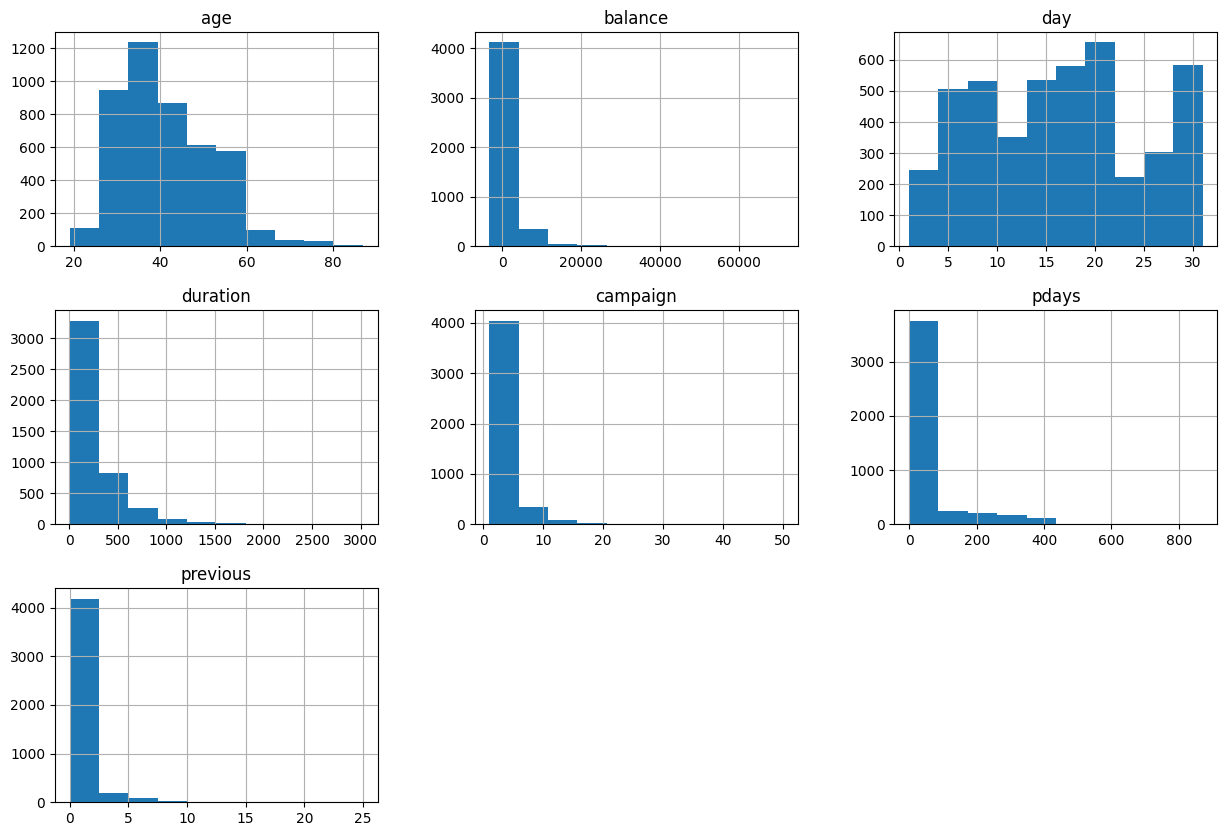

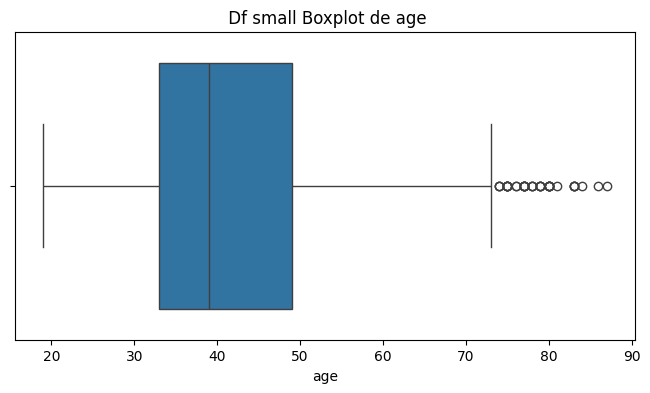

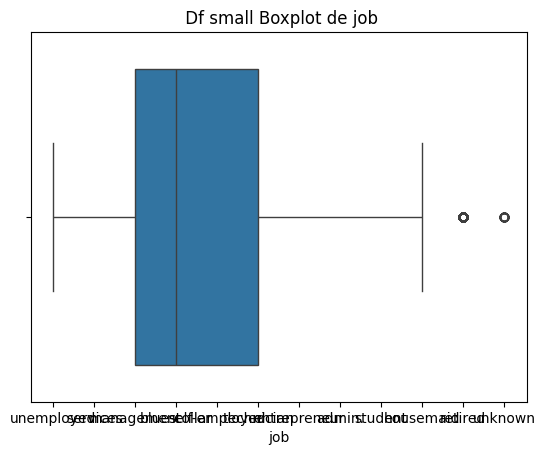

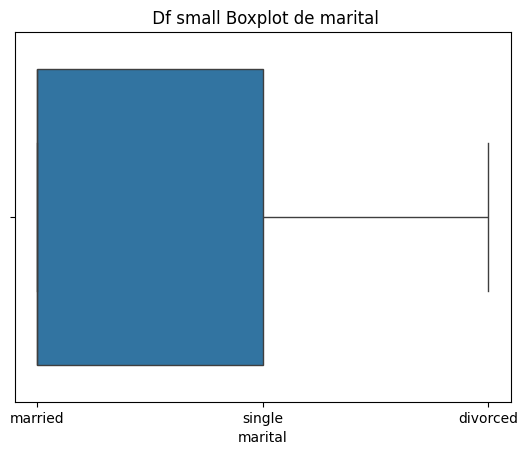

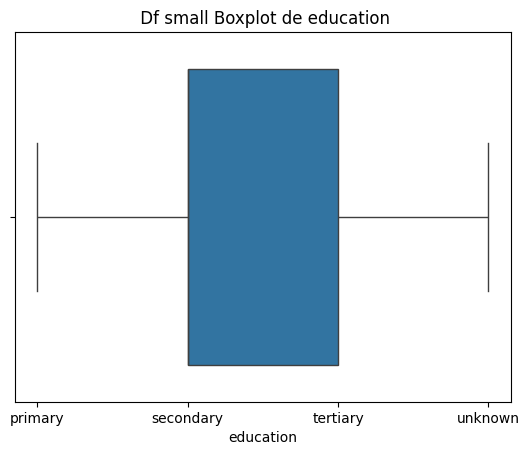

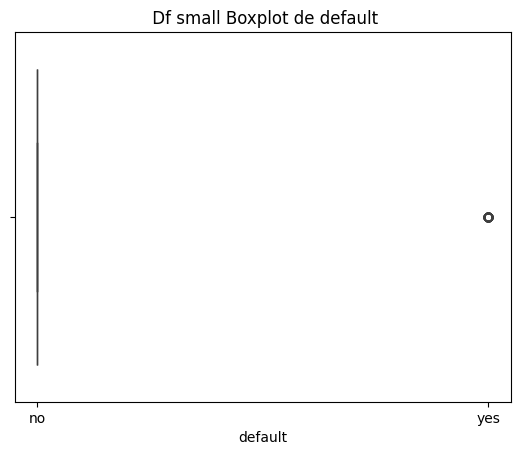

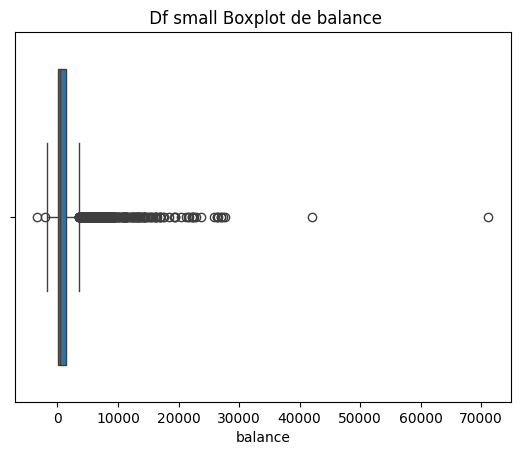

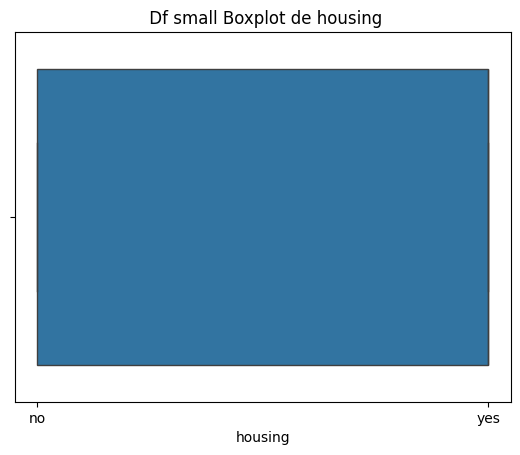

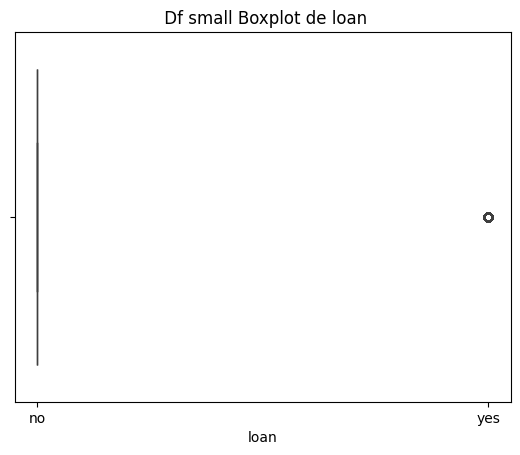

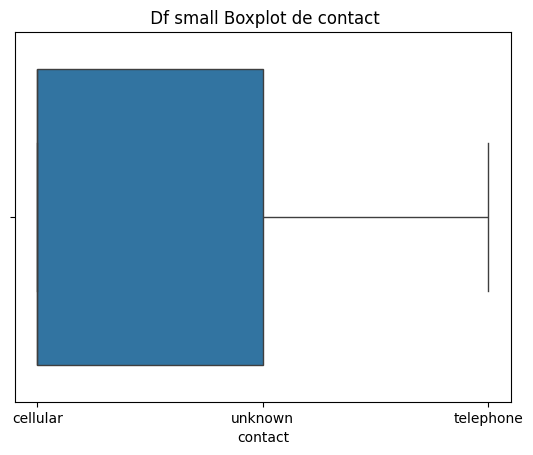

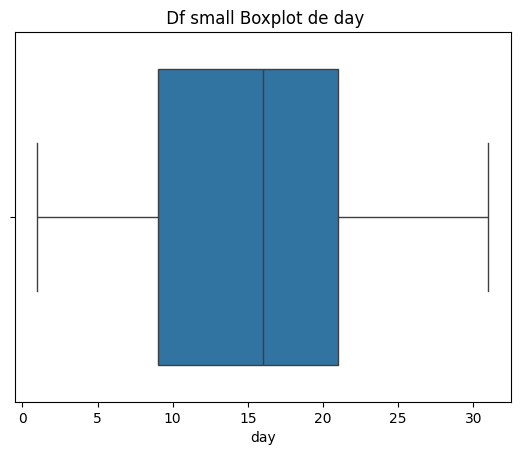

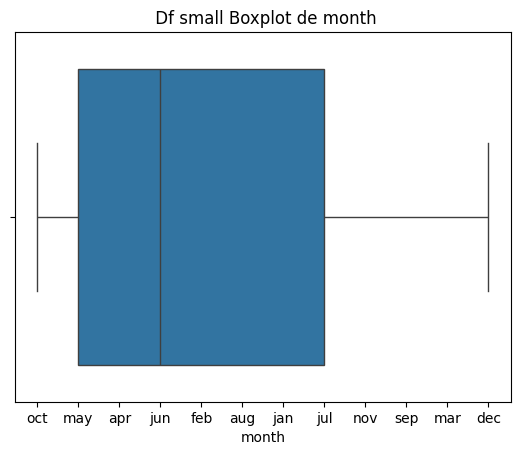

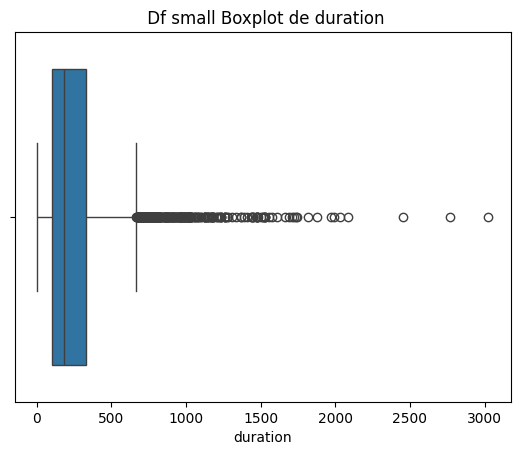

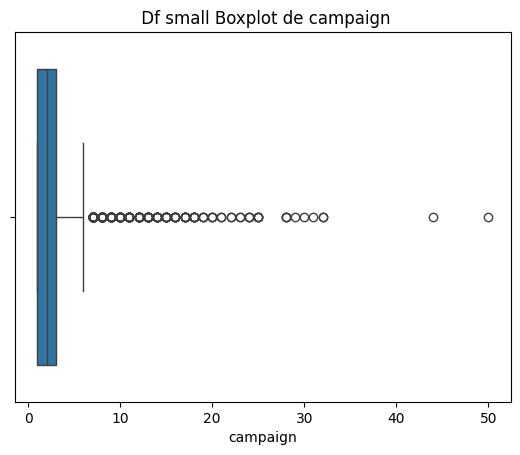

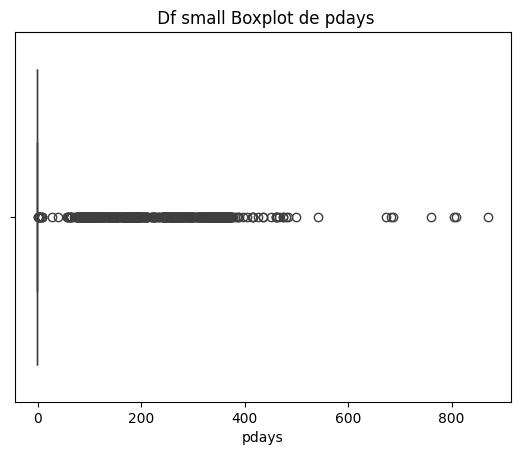

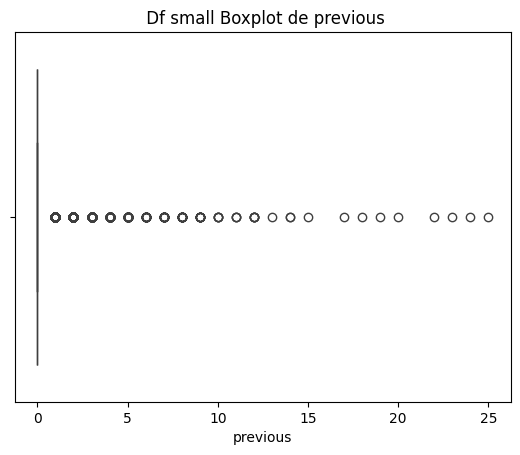

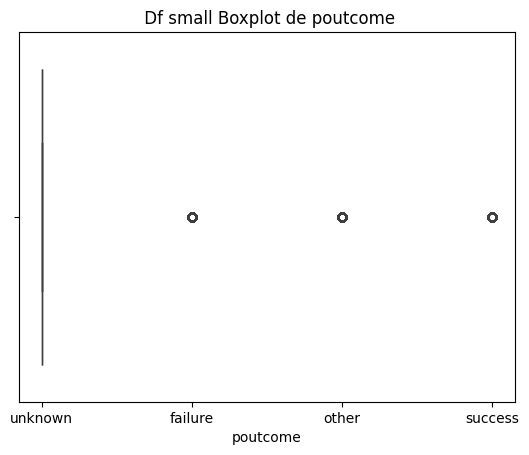

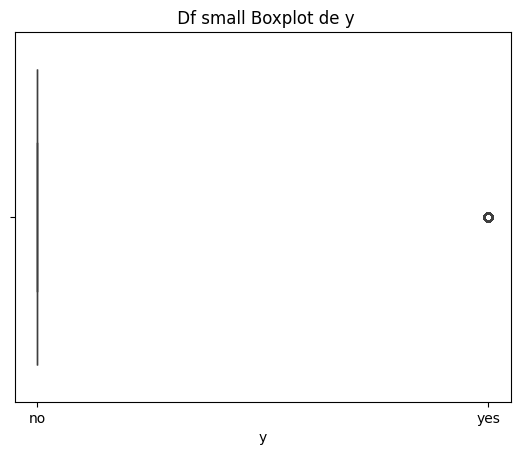

In [ ]:
#para verificar si existen ourliers en el data set acotado
#observar comportamiento de las variables
df_small.hist(bins=10, figsize=(15,10))
plt.show()

# Boxplots para ver outliers
plt.figure(figsize=(8, 4))
for col in df_small.columns: #recorro columnas del dataframe
    sns.boxplot(x=df_small[col])
    plt.title(f' Df small Boxplot de {col}')
    plt.show()



In [ ]:
#Debo revisar los siguientes columnas segun lo observado en boxplot
    #balance > 40000
    #duration > 2000
    #pdays >800


df_small[df_small["balance"] > 40000]
df_small = df_small[df_small["balance"] <= 40000]
df_small[df_small["balance"] > 40000]

df_small[df_small["duration"] > 2000]
df_small = df_small[df_small["duration"] <= 2000]
df_small[df_small["duration"] > 2000]

df_small[df_small["pdays"] > 800]
df_small = df_small[df_small["pdays"] <= 800]
df_small[df_small["pdays"] > 800]

df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4511 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4511 non-null   int64 
 1   job        4511 non-null   object
 2   marital    4511 non-null   object
 3   education  4511 non-null   object
 4   default    4511 non-null   object
 5   balance    4511 non-null   int64 
 6   housing    4511 non-null   object
 7   loan       4511 non-null   object
 8   contact    4511 non-null   object
 9   day        4511 non-null   int64 
 10  month      4511 non-null   object
 11  duration   4511 non-null   int64 
 12  campaign   4511 non-null   int64 
 13  pdays      4511 non-null   int64 
 14  previous   4511 non-null   int64 
 15  poutcome   4511 non-null   object
 16  y          4511 non-null   object
dtypes: int64(7), object(10)
memory usage: 634.4+ KB


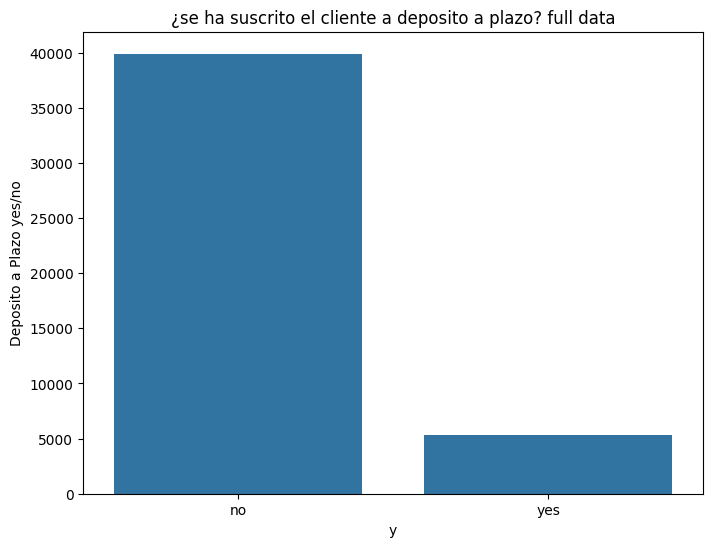

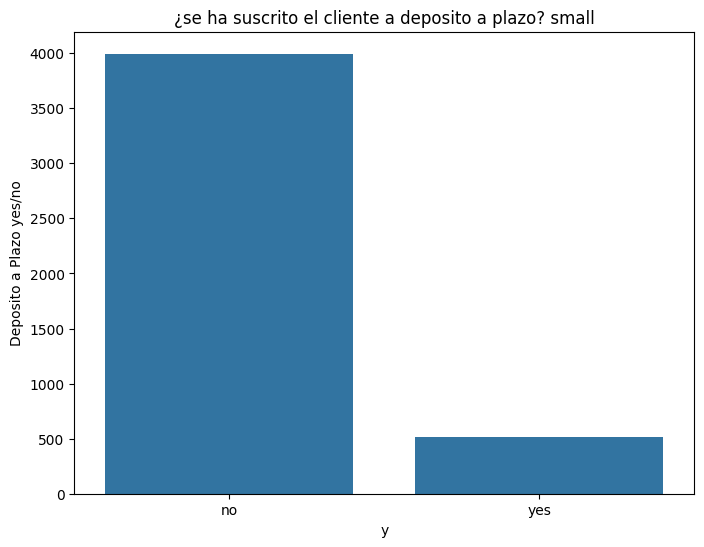

In [ ]:
#Visualizaciones univariadas y multivariadas
#explorar comportamiento de la variable objetivo o target: y en la muestra
plt.figure(figsize=(8, 6))

sns.countplot(data=df_full,x='y')
plt.title('¿se ha suscrito el cliente a deposito a plazo? full data')
plt.xlabel('y')
plt.ylabel('Deposito a Plazo yes/no')
plt.show()

plt.figure(figsize=(8, 6))

sns.countplot(data=df_small,x='y')
plt.title('¿se ha suscrito el cliente a deposito a plazo? small')
plt.xlabel('y')
plt.ylabel('Deposito a Plazo yes/no')
plt.show()

En ambos datasets se observa que la mayoria de los clientes no se han suscrito a depositos a plazo.

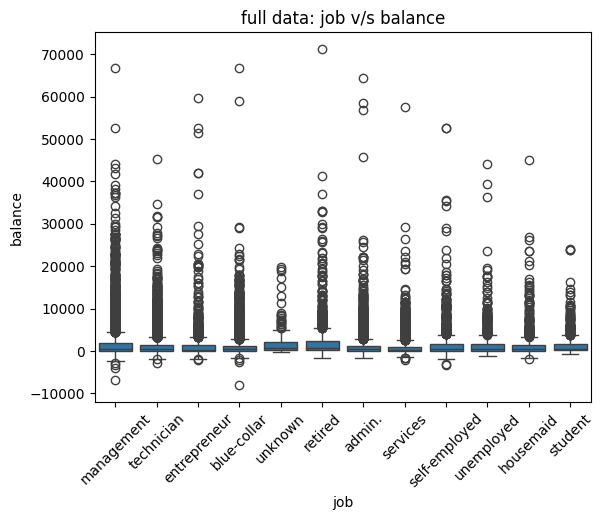

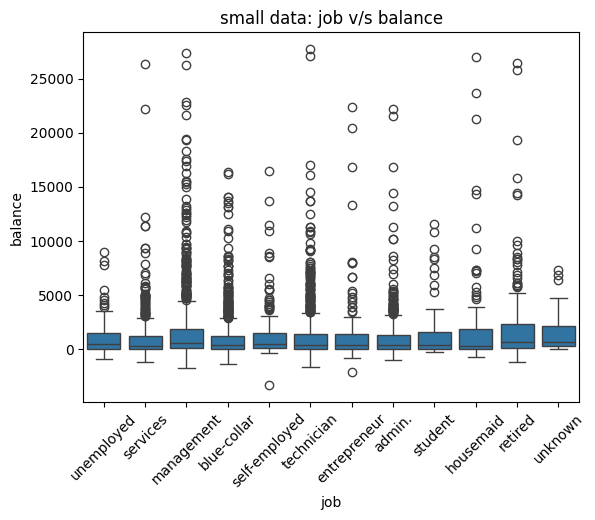

In [ ]:
#exploración de los datos: visualización multivariada
sns.boxplot(x="job", y="balance", data=df_full)
plt.xticks(rotation=45)
plt.title("full data: job v/s balance")
plt.show()

#exploración de los datos: visualización multivariada
sns.boxplot(x="job", y="balance", data=df_small)
plt.xticks(rotation=45)
plt.title("small data: job v/s balance")
plt.show()

En esta visualicación podemos observar las diferencias en el balance entre los grupos o nivel educación de los clientes.

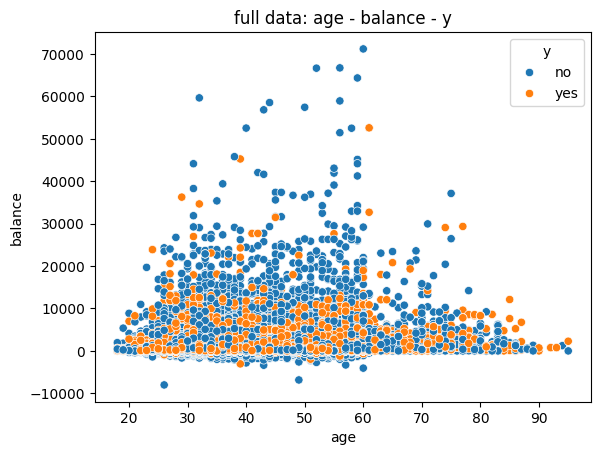

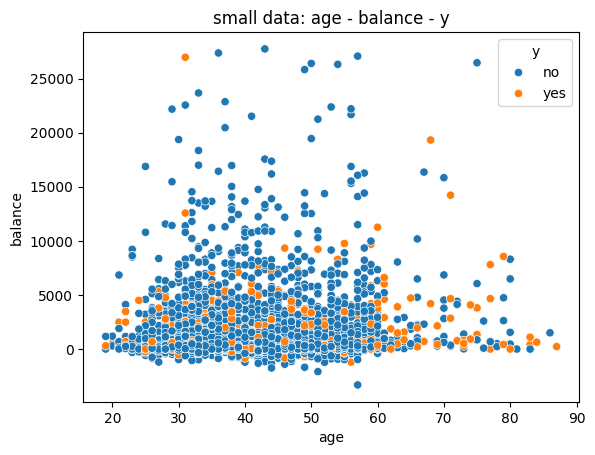

In [ ]:
sns.scatterplot(x="age", y="balance", hue="y", data=df_full)
plt.title("full data: age - balance - y")
plt.show()
sns.scatterplot(x="age", y="balance", hue="y", data=df_small)
plt.title("small data: age - balance - y")
plt.show()

De estas visualizaciones podemos concluir que es entre los 20 y los 60 años y entre los 0 y 10000 de balance donde se concentran las personas que no toman depositos a plazo.

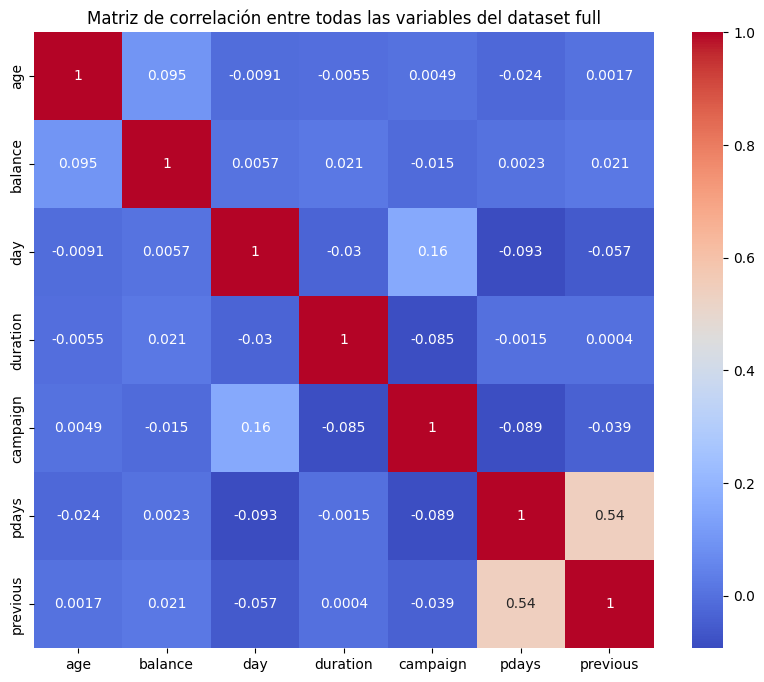

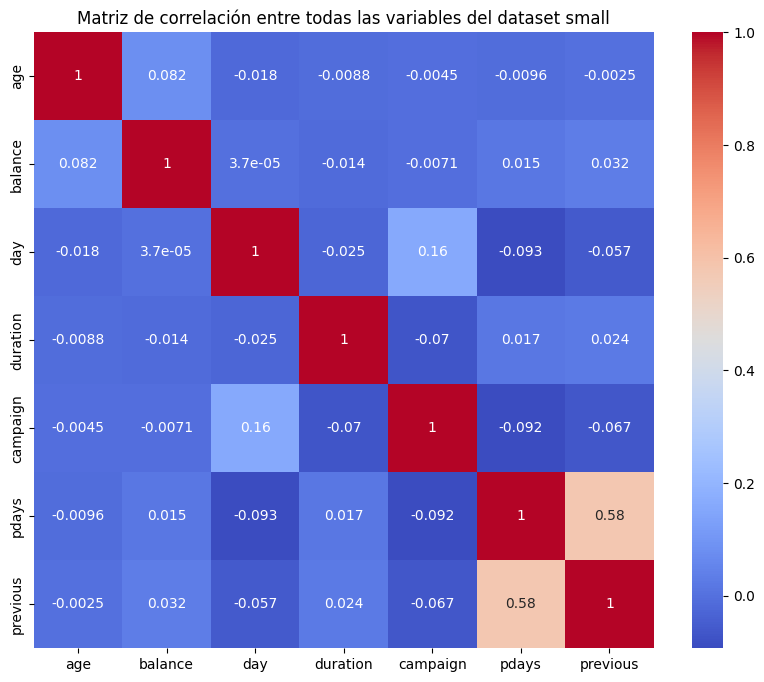

In [ ]:
#Explorar relación entre las variables numericas con mapas de calor
corr = df_full.select_dtypes(include=['number']).corr() #solo buscar correlacion entre las variables numericas


plt.figure(figsize=(10, 8))

#df_full
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre todas las variables del dataset full")
plt.show()


corr = df_small.select_dtypes(include=['number']).corr() #solo buscar correlacion entre las variables numericas
#df_small
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre todas las variables del dataset small")
plt.show()

Se observa una correlación entre pdays y previous, lo cual tiene sentido porque mientras más dias hayan pasado desde su ultima campaña existen mas posibilidades de contactarlo por nuevas campañas. Aprte de esto, no se observan relaciones importantes entre las variables numericas de los datasets

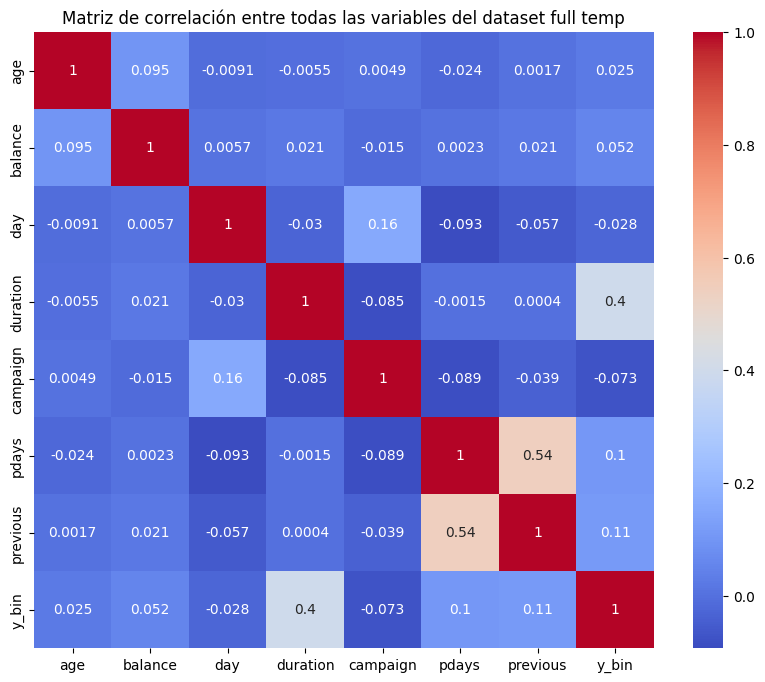

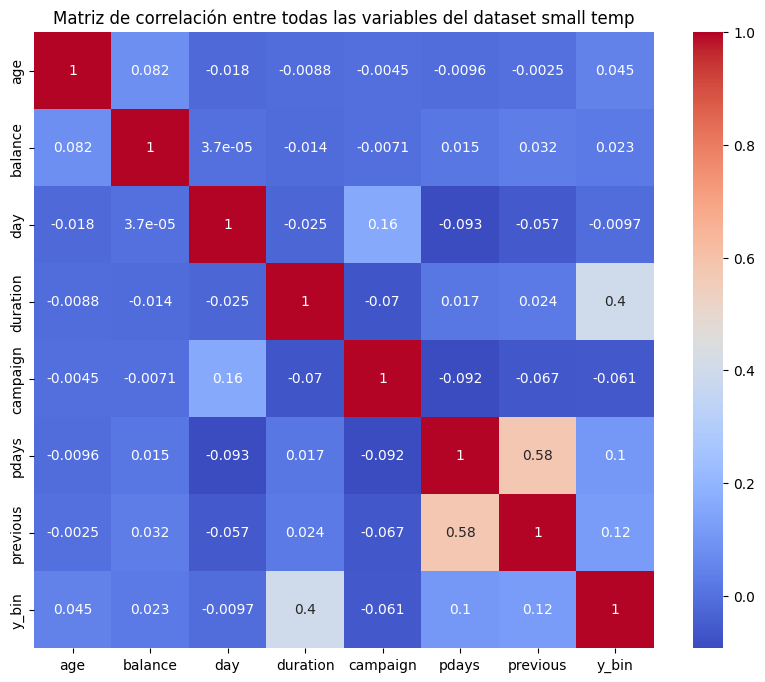

In [ ]:
#aplicaré una transformación de la variable objetivo y para incluirla en el mapa de calor.
#no = 0 y yes =1
# Copiar a otro DataFrame
df_full_temp = df_full.copy()
df_full_temp["y_bin"] = df_full_temp["y"].map({"yes": 1, "no": 0})

df_full_temp.tail()

df_small_temp = df_small.copy()
df_small_temp["y_bin"] = df_small["y"].map({"yes": 1, "no": 0})

df_small_temp.head()


plt.figure(figsize=(10, 8))

#df_full_temp
corr = df_full_temp.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre todas las variables del dataset full temp")
plt.show()

#df_small_temp
corr = df_small_temp.select_dtypes(include=['number']).corr() #solo buscar correlacion entre las variables numericas
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre todas las variables del dataset small temp")
plt.show()

Con esta nueva variable en el mapa de calor podemos observar que existe una correlacion entre la variable objetivo y la duración de la llamada.


In [ ]:
#Estadísticas descriptivas:
df_full.describe().T
df_small.describe().T


#calcular la moda de cada calumna
columnas = df_full.columns
print("full data:")
for col in columnas:
    #mostrar mean para las columnas numericas
    if pd.api.types.is_numeric_dtype(df_full[col]): #pd.api.types.is_numeric_dtype() funcion de pandas para verificar si el tipo de dato es numeric
      print(col, ": mean", df_full[col].mean().round(2), "mode: ", df_full[col].mode().iloc[0])
    else:
      print(col ,": mode:",df_full[col].mode().iloc[0])
print("-------------------------------------")
print("data acotada:")
for col in columnas:
    #mostrar mean para las columnas numericas
    if pd.api.types.is_numeric_dtype(df_small[col]): #pd.api.types.is_numeric_dtype() funcion de pandas para verificar si el tipo de dato es numeric
      print(col, ": mean", df_small[col].mean().round(2), "mode: ", df_small[col].mode().iloc[0])
    else:
      print(col ,": mode:",df_small[col].mode().iloc[0])

full data:
age : mean 40.93 mode:  32
job : mode: blue-collar
marital : mode: married
education : mode: secondary
default : mode: no
balance : mean 1354.27 mode:  0
housing : mode: yes
loan : mode: no
contact : mode: cellular
day : mean 15.81 mode:  20
month : mode: may
duration : mean 258.05 mode:  124
campaign : mean 2.76 mode:  1
pdays : mean 40.19 mode:  -1
previous : mean 0.57 mode:  0
poutcome : mode: unknown
y : mode: no
-------------------------------------
data acotada:
age : mean 41.16 mode:  34
job : mode: management
marital : mode: married
education : mode: secondary
default : mode: no
balance : mean 1399.33 mode:  0
housing : mode: yes
loan : mode: no
contact : mode: cellular
day : mean 15.93 mode:  20
month : mode: may
duration : mean 261.61 mode:  123
campaign : mean 2.8 mode:  1
pdays : mean 39.31 mode:  -1
previous : mean 0.54 mode:  0
poutcome : mode: unknown
y : mode: no


##3. Implementación de Modelos:

La variable objetivo es nominal binaria por lo que utilizare modelos de clasificación de Decision Tree y Support Vector Machine (SVM).

Para Decisión Tree utilizaré: Decision Tree Classifier  
Como Support Vector Machine (SVM): SVC  

In [ ]:
#para optimizar parametros utilizare optuna
!pip install lightgbm optuna

In [ ]:
#preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
#modelos
from sklearn.model_selection import train_test_split
#arbol
from sklearn.tree import DecisionTreeClassifier
#SVM
from sklearn.svm import SVC

#evaluación y mejora de hiperparametros
from sklearn.metrics import accuracy_score

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


In [ ]:
df_full.info()

# Dividir data en features y target.
X_full = df_full.drop(columns="y")
y_full = df_full["y"]

# Dividir data en features y target data acotada.
X_small = df_small.drop(columns="y")
y_small = df_small["y"]

<class 'pandas.core.frame.DataFrame'>
Index: 45205 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45205 non-null  int64 
 1   job        45205 non-null  object
 2   marital    45205 non-null  object
 3   education  45205 non-null  object
 4   default    45205 non-null  object
 5   balance    45205 non-null  int64 
 6   housing    45205 non-null  object
 7   loan       45205 non-null  object
 8   contact    45205 non-null  object
 9   day        45205 non-null  int64 
 10  month      45205 non-null  object
 11  duration   45205 non-null  int64 
 12  campaign   45205 non-null  int64 
 13  pdays      45205 non-null  int64 
 14  previous   45205 non-null  int64 
 15  poutcome   45205 non-null  object
 16  y          45205 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [ ]:
# Separar variables.
#la variable num_cols se utiliza para ambos datasets debido a que poseen las mismas columnas
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"] #education podría sere ordinal, pero existe la categoria unknown
nom_cols= ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

#las columnas son las mismas pasa ambos df

In [ ]:
# Split. Apartar data de entrenamiento y data de test
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols), #escalare la data de todas formas ya que utilizare este pre proceso para arbol y SVM
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

DecisionTreeClassifier -> será entrenado con el dataset que contiene toda la data -> full

In [ ]:
# Crear pipeline.
pipeline_tree = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier()) #Los parametros los optimizare con optuna
])

In [ ]:
#Optimizar hiperparametros
#Información de modulo "Decision Tree Classifier y Random Forest Classifier" de skillnest
#Hiperparámetros de Decision Tree Classifier

#criterion: Define la función para medir la calidad de una división. Puede ser “gini” para el índice de Gini o “entropy” para la ganancia de información.
#splitter: Estrategia utilizada para dividir en cada nodo. Puede ser “best” para la mejor división o “random” para divisiones aleatorias.
#max_depth: La profundidad máxima del árbol. Limitar la profundidad del árbol ayuda a prevenir el sobreajuste.
#min_samples_split: El número mínimo de muestras requeridas para dividir un nodo. Un valor mayor previene el sobreajuste.
#min_samples_leaf: El número mínimo de muestras que debe tener un nodo hoja. Ayuda a suavizar el modelo.
#max_features: El número máximo de características a considerar para encontrar la mejor división. Puede ser un valor entero, un porcentaje o “sqrt” y “log2” para las raíces cuadradas y logaritmos, respectivamente.

def objective(trial):
    # Hiperparámetros a optimizar
    params = {
        "classifier__max_depth": trial.suggest_int("max_depth", 1, 20),
        "classifier__min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "classifier__min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "classifier__criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]) #b
    }

    # Asignar los params al pipeline
    pipeline_tree.set_params(**params)

    # Validación cruzada (o usa train_test_split)
    score = cross_val_score(pipeline_tree, X_train_full, y_train_full, cv=5, scoring="accuracy")

    return score.mean()

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Mejores hiperparámetros:", study.best_params)

[I 2025-07-16 01:32:27,045] A new study created in memory with name: no-name-2b51a9fa-9120-4987-a600-a177c63ed2e9
[I 2025-07-16 01:32:32,447] Trial 0 finished with value: 0.8971906508884429 and parameters: {'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8971906508884429.
[I 2025-07-16 01:32:36,889] Trial 1 finished with value: 0.8882590540345443 and parameters: {'max_depth': 2, 'min_samples_split': 16, 'min_samples_leaf': 12, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8971906508884429.
[I 2025-07-16 01:32:44,926] Trial 2 finished with value: 0.8977160436617323 and parameters: {'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8977160436617323.
[I 2025-07-16 01:32:54,416] Trial 3 finished with value: 0.8984349860949508 and parameters: {'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 17, 'criterion': 'gini'}. Best is trial 

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 13, 'criterion': 'gini'}


In [ ]:
# Crear pipeline com hiperparametros optimizados
pipeline_tree = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier(**study.best_params))
])

In [ ]:
# Entrenar.
pipeline_tree.fit(X_train_full, y_train_full)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=13,
                                        min_samples_split=11))])

In [ ]:
# Predecir.
y_pred_tree = pipeline_tree.predict(X_test_full)
y_pred_tree

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7971
         yes       0.65      0.34      0.44      1070

    accuracy                           0.90      9041
   macro avg       0.78      0.66      0.69      9041
weighted avg       0.88      0.90      0.89      9041



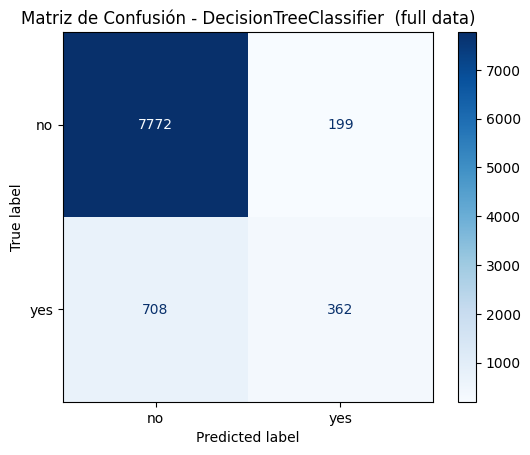

Accuracy del modelo: 0.899679239022232


In [ ]:
#Evaluar

print(classification_report(y_test_full, y_pred_tree)) #modulo skillnest
# Matriz de confusión data  full
cm_tree = confusion_matrix(y_test_full, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['no', 'yes'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - DecisionTreeClassifier  (full data)")
plt.show()
accuracy_tree = accuracy_score(y_test_full, y_pred_tree)
print(f"Accuracy del modelo:", accuracy_tree)

 El modelo tiene un alto accuracy general (0.90)
Del reporte de clasificación podemos extraer que existe una precisión del 92% para no. Es decir de todos los que precide como "no", el 92% es "no".
Para yes posee una precisión de 0.65, eto quiere decir que de los que predice como yes, solo el 65% realmente es yes.

SVC -> será entrenado con el dataset acotado -> small

In [ ]:
# Optuna.
def objective(trial):

  params = {
    "C": trial.suggest_loguniform("C", 1e-2, 1e2),
    "gamma": trial.suggest_loguniform("gamma", 1e-4, 1e0),
    "kernel": "rbf"
  }
  pipeline = Pipeline([
    ("pp", preprocessor), #utilizo el mismo preproceso
    ("model", SVC(**params, random_state=42))
  ])

  score = cross_val_score(pipeline, X_train_small, y_train_small, cv=3, scoring="accuracy", n_jobs=-1)
  return score.mean()

In [ ]:
# Optuna.
study_svc = optuna.create_study(direction="maximize")
study_svc.optimize(objective, n_trials=20)

best_params_svc = study_svc.best_params
print("Mejores hiperparámetros (clasificación):", best_params_svc)

[I 2025-07-16 01:34:37,973] A new study created in memory with name: no-name-c9c94b4a-194c-4be1-b736-9395db848834
/tmp/ipython-input-233-4029442894.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-2, 1e2),
/tmp/ipython-input-233-4029442894.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "gamma": trial.suggest_loguniform("gamma", 1e-4, 1e0),
[I 2025-07-16 01:34:43,141] Trial 0 finished with value: 0.8835919998487789 and parameters: {'C': 0.015800159705803958, 'gamma': 0.00034070865578912185}. Best is trial 0 with value: 0.8835919998487789.
/tmp/ipython-input-233-4029442894.py:5: FutureWarning: suggest_loguniform has been depre

Mejores hiperparámetros (clasificación): {'C': 3.823804397941078, 'gamma': 0.02933658970022904}


In [ ]:
# Pipeline svc
pipeline_svc = Pipeline([
  ("pp", preprocessor),
  ("model", SVC(**best_params_svc, random_state=42))
])


In [ ]:
# Entrenamiento.
pipeline_svc.fit(X_train_small, y_train_small)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model',
                 SVC(C=3.823804397941078, gamma=0.02933658970022904,
                     random_state=42))])

In [ ]:
# Predecir
y_pred_svc = pipeline_svc.predict(X_test_small)

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.59      0.28      0.38        96

    accuracy                           0.90       903
   macro avg       0.75      0.63      0.66       903
weighted avg       0.88      0.90      0.89       903



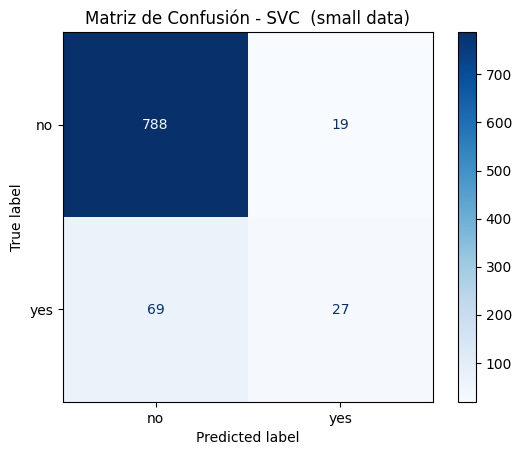

Accuracy: 0.9025


In [ ]:
#Evaluar

print(classification_report(y_test_small, y_pred_svc))
# Matriz de confusión para data acotada
cm_svc = confusion_matrix(y_test_small, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['no', 'yes'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - SVC  (small data)")
plt.show()

accuracy_svc = accuracy_score(y_test_small, y_pred_svc)
print(f"Accuracy: {accuracy_svc:.4f}")

El accuracy general es de 0,9014, levemente superior al primer modelo, que fue entrenado con toda la data.
De todas las predicciones “no” podemos observar que el 92% es correcto y que de todas las predicciones de "yes" solo el 59 % es correcto.



| Métrica                     |       DecisionTreeClassifier            | SVC        |
| --------------------------- | ------------------------------------- | -------------------- |
| accuracy                | 0.9006                                  | 0.9014                 |
| precision no   | 0.92 | 0.92 |
| precision yes | 0.65                                    |       0.59               |


Conclusión Final y Comparación de Rendimiento:

Amos modelos presentaron un excelente rendimiento y aunque el accuracy o rendimiento general del es levemente superior en el modelo SVC, cuando se trata de predecir el valor "yes" de la variable objetivo posee un comportamiento un tanto inferior al modelo de clasifiación Decision Tree, por lo que este ultimo es el mejor modelo para este problema.

In [ ]:
#exportar el modelo seleccionado
import joblib

joblib.dump(pipeline_tree, "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen - Intento II/models/tree_model.pkl")

['/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/Examen - Intento II/models/tree_model.pkl']